### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.metrics import auc, roc_auc_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn import svm

# Data Exploration & Visualization

In [2]:
#import data into dataframe
voice_df = pd.read_csv("voice.csv")
#preview data
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


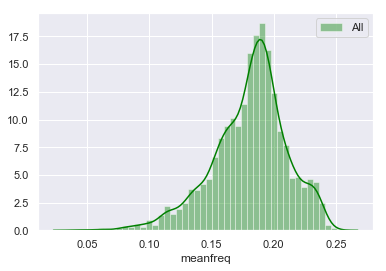

In [3]:
%%capture --no-stdout --no-display
#all mean frequency 
sns.set(style="darkgrid")
sns.distplot( voice_df["meanfreq"] , color="green", label="All")
plt.legend()
plt.show()

In [4]:
#sort df by gender
gender = voice_df.set_index(['label'])
#df for females
female_df = gender.loc['female']
#def for males
male_df = gender.loc['male']

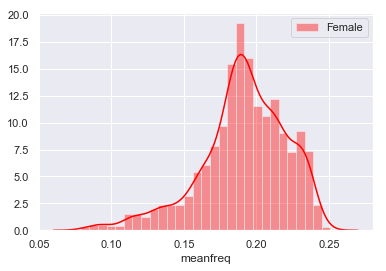

In [5]:
#female hist mean freq
sns.distplot( female_df["meanfreq"] , color="red", label="Female")
plt.legend()
plt.show()

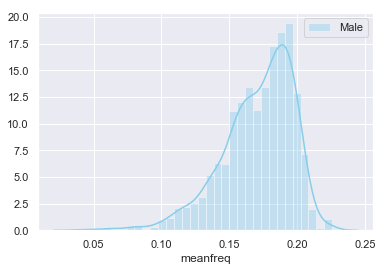

In [6]:
#male hist mean freq
sns.distplot( male_df["meanfreq"] , color="skyblue", label="Male")
plt.legend()
plt.show()

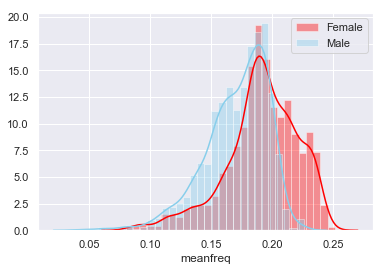

In [7]:
#overlay two hists
sns.distplot( female_df["meanfreq"] , color="red", label="Female")
sns.distplot( male_df["meanfreq"] , color="skyblue", label="Male")

plt.legend()

plt.show()

In [8]:
count_row = voice_df.shape[0]  # gives number of row count
male_count = male_df.shape[0]
female_count = female_df.shape[0]
print count_row, male_count, female_count
#make sure we have an equal ratio 
#male ratio
print("male ratio: ")
print(male_count/float(count_row))
#female ratio
print("female ratio: ")
print(female_count/float(count_row))

3168 1584 1584
male ratio: 
0.5
female ratio: 
0.5


## PCA

explained variance ratio (first two components): [0.45216391 0.11870609]
explained variance ratio (first three components): [0.45216391 0.11870609 0.10909939]


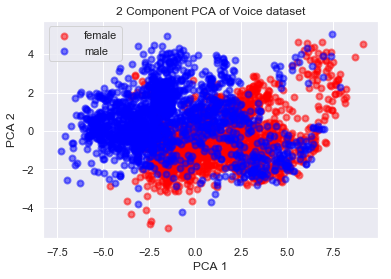

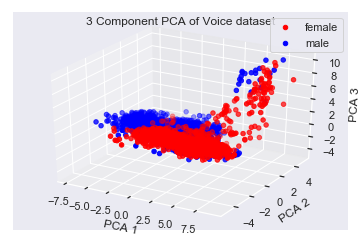

In [9]:
# ZScore data for PCA Analysis
#Convert labels into integer classes
y = voice_df[['label']]
#covert to dumm variable,1 for female, 0 for male.
y = [1 if each == "female" else 0 for each in y.label]

#Scale features
X=preprocessing.scale(voice_df.drop(columns=['label']))

#PCA Analysis to visualize data in a low-dimension
y_arr=np.asarray(y)

#TWO Component PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['red', 'blue']
lw = 2

for color, i, target_name in zip(colors, [0, 1], ['female','male']):
    plt.scatter(X_r[y_arr == i, 0], 
                X_r[y_arr == i, 1], 
                color=color, 
                alpha=.5, 
                lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Component PCA of Voice dataset')



#THREE Component PCA
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, i, target_name in zip(colors, [0, 1], ['female','male']):
    
    ax.scatter(X_r[y_arr == i, 0], 
               X_r[y_arr == i, 1],
               X_r[y_arr == i, 2],
               c=c, 
               label=target_name)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3 Component PCA of Voice dataset')
ax.legend(loc='best', shadow=False, scatterpoints=1)

#ax.view_init(60, 60)
plt.show()


# Data Preparation
The data used to train and test the algorithms was normalized using MinMax normalization limiting the range of values to (0,1].

In [10]:
#try with all features
X = voice_df.drop('label', axis=1) 

#get target labels. 
y = voice_df[['label']]
#covert to dumm variable,1 for female, 0 for male.
y = [1 if each == "female" else 0 for each in y.label]


#normalize the features using min-max
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
                         

#preview
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380


In [11]:
#80/20 split for train and test dataset. X contains the features, y contains the target labels
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train Neural Network

In [12]:
#build model
NN_build = MLPClassifier(solver='lbfgs', alpha=1e-2, random_state=1)
#fit model
NN = NN_build.fit(X_train, y_train) 
#view hyperparameters
print(NN)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


# Evaluate Neural Network

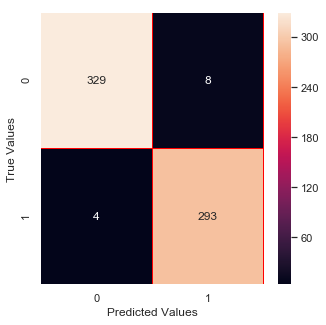

('accuracy:', 0.9810725552050473)


In [13]:
#get accuracy and generate confusion matrix

#get predictions
predictions = NN.predict(X_test)
#generate confusion matrix 
cm = confusion_matrix(y_test,predictions)
#visualize confusion matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
#get accuracy 
print("accuracy:",accuracy_score(y_test, predictions))

# Improve Neural Network

Optimize by cross-validated grid-search over a parameter grid.

In [14]:
#try different hyperparameters 
parameters = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs'], 
    'max_iter': [300], 
    'alpha': 10.0 ** -np.arange(1, 7), 
    'hidden_layer_sizes': [(6),(5,2), (10,10,10), (20)],
    'random_state':[1]
}
NN_grid = GridSearchCV(MLPClassifier(), parameters, cv = 5)

In [15]:
#fit and retrieve best hyperparameters
NN_grid.fit(X_train, y_train)
print(NN_grid.best_params_)
print("Best score: %0.4f" % NN_grid.best_score_)

{'solver': 'lbfgs', 'activation': 'tanh', 'max_iter': 300, 'random_state': 1, 'alpha': 0.1, 'hidden_layer_sizes': 20}
Best score: 0.9779


Build new neural network with optimized hyperparameters

In [16]:
#build new model
NN_new_build = MLPClassifier(activation = 'tanh',
                             solver='lbfgs', 
                             alpha=0.1, 
                             hidden_layer_sizes=(20), 
                             max_iter = 300,  
                             random_state=1)
#fit training data 
NN_new = NN_new_build.fit(X_train, y_train) 
#view hyperparameters
print(NN_new)

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


# Evaluate New Neural Network

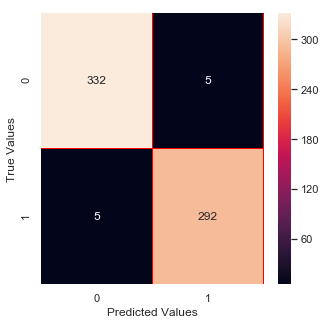

('accuracy:', 0.9842271293375394)


In [17]:
#get predictions
predictions_new = NN_new.predict(X_test)
#generate confusion matrix 
cm = confusion_matrix(y_test,predictions_new)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
#get accuracy 
print("accuracy:",accuracy_score(y_test, predictions_new))

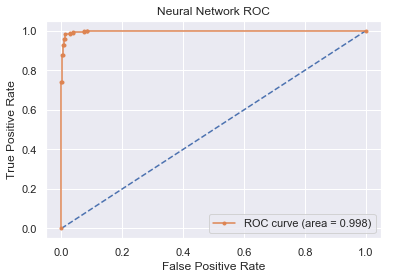

In [18]:
#generate ROC
#get probabilities for positives
probs = NN_new.predict_proba(X_test)
probs = probs[:, 1]
#get auc score
auc = roc_auc_score(y_test, probs)

#plot ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.3f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC')
plt.legend(loc="lower right")
plt.legend(loc="lower right")
# show the plot
plt.show()

In [19]:
#Compare Empirical MCR to CV MCR look for overfitting
#Empirical MCR
predictions = NN_new.predict(X)
MCR = 1 - accuracy_score(y, predictions)
print("Empirical MCR: ",round( MCR, 3))

#CV MCR
scores = cross_val_score(NN_new_build, X, y, cv=10)
CV_MCR = 1 - scores.mean()
print("CV MCR: ", round(MCR,3))

('Empirical MCR: ', 0.007)
('CV MCR: ', 0.007)


# Visualize NN Results in Low-Dimension

explained variance ratio (first two components): [0.49624278 0.12574188]
explained variance ratio (first three components): [0.49624278 0.12574188 0.09362669]


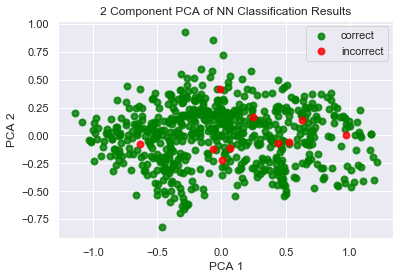

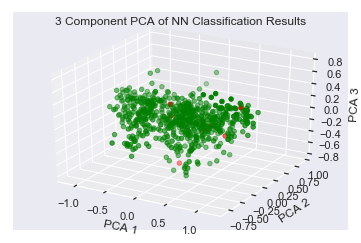

In [20]:
results=NN_new.predict(X_test) == y_test
results=np.asarray(results)

#TWO Component PCA
pca = PCA(n_components=2)
X_r = pca.fit(X_test).transform(X_test)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['green', 'red']
lw = 2

for color, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    plt.scatter(X_r[results == i, 0],
                X_r[results == i, 1], 
                color=color, 
                alpha=.8, 
                lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Component PCA of NN Classification Results')



#THREE Component PCA
pca = PCA(n_components=3)
X_r = pca.fit(X_test).transform(X_test)

# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    
    ax.scatter(X_r[results == i, 0], 
               X_r[results == i, 1],
               X_r[results == i, 2], 
               c=c, )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3 Component PCA of NN Classification Results')

plt.show()

# Train Logistic Regression

In [21]:
logreg_build = LogisticRegression(solver = 'lbfgs')
logreg = logreg_build.fit(X_train,y_train) 
#view hyperparameters 
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluate Logistic Regression

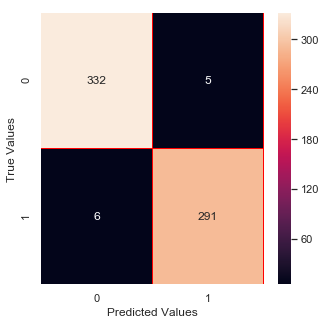

('accuracy:', 0.9826498422712934)


In [22]:
#get accuracy and generate confusion matrix

#get predictions
predictions = logreg.predict(X_test)
cm = confusion_matrix(y_test,predictions)
#visualize confusion matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
print("accuracy:", accuracy_score(y_test, predictions))

# Improve Logistic Regression 

Optimize by cross-validated grid-search over a parameter grid.

In [23]:
parameters ={
    'C':np.logspace(-3,3,7), 
    'solver':['lbfgs'], 
    'max_iter': [300]
}
#try different parameters 
logreg_grid = GridSearchCV(LogisticRegression(), parameters ,cv = 5)
#fit and retrieve best hyperparameters
logreg_grid.fit(X_train, y_train)
#fit and retrieve best hyperparameters
print(logreg_grid.best_params_)
print("Best score: %0.4f" % logreg_grid.best_score_)

{'C': 100.0, 'max_iter': 300, 'solver': 'lbfgs'}
Best score: 0.9712


Build new logistic regression model with optimized hyperparameters

In [24]:
logreg_new_build = LogisticRegression(C = 100.0, 
                                      max_iter = 300, 
                                      solver ='lbfgs')
#fit training data 
logreg_new = logreg_new_build.fit(X_train, y_train) 
#view hyperparameters
logreg_new

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluate New Logistic Regression Model

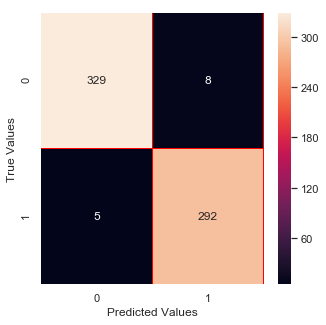

('accuracy:', 0.9794952681388013)


In [25]:
#get predictions
predictions = logreg_new.predict(X_test)
cm = confusion_matrix(y_test,predictions)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
print("accuracy:", accuracy_score(y_test, predictions))

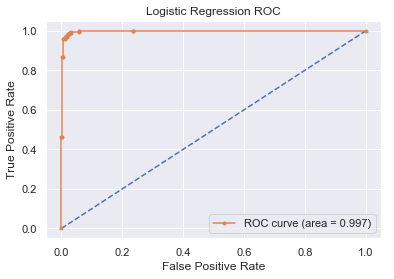

In [26]:
#generate ROC

#get probabilities for positives
probs = logreg_new.predict_proba(X_test)
probs = probs[:, 1]
#get auc score
auc = roc_auc_score(y_test, probs)

#plot ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker = '.', label='ROC curve (area = %0.3f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.legend(loc="lower right")
# show the plot
plt.show()

In [27]:
#Empirical MCR
predictions = logreg_new.predict(X)
MCR = 1 - accuracy_score(y, predictions)
print("Empirical MCR: ",round( MCR, 3))

#CV MCR
scores = cross_val_score(logreg_new_build, X, y, cv=10)
CV_MCR = 1 - scores.mean()
print("CV MCR: ", round(MCR,3))


('Empirical MCR: ', 0.025)
('CV MCR: ', 0.025)


# Visualize Logist Regression Results in Low-Dimension

explained variance ratio (first two components): [0.49624278 0.12574188]
explained variance ratio (first three components): [0.49624278 0.12574188 0.09362669]


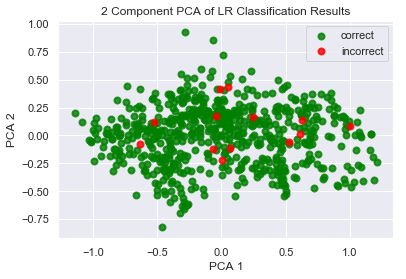

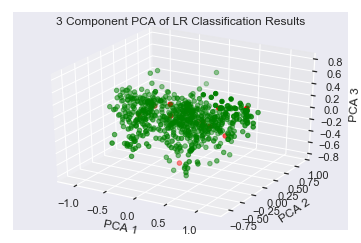

In [28]:
results=logreg_new.predict(X_test) == y_test 
results=np.asarray(results)

#TWO Component PCA
pca = PCA(n_components=2)
X_r = pca.fit(X_test).transform(X_test)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['green', 'red']
lw = 2

for color, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    plt.scatter(X_r[results == i, 0],
                X_r[results == i, 1], 
                color=color,
                alpha=.8, 
                lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Component PCA of LR Classification Results')



#THREE Component PCA
pca = PCA(n_components=3)
X_r = pca.fit(X_test).transform(X_test)

# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    
    ax.scatter(X_r[results == i, 0], 
               X_r[results == i, 1],
               X_r[results == i, 2],
               c=c, )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3 Component PCA of LR Classification Results')

plt.show()

# Train Naive Bayes

In [29]:
# Fit NaiveBayes model to our data
# build model
gb_mdl = GaussianNB()
# fit model
gb_mdl.fit(X_train, y_train)
# view hyperparameters
gb_mdl 

GaussianNB(priors=None)

# Evaluate Naive Bayes Model

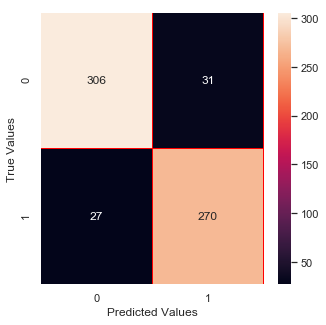

('accuracy:', 0.9085173501577287)


In [30]:
# get accuracy and generate confusion matrix

# get predictions
predictions = gb_mdl.predict(X_test)
# generate confusion matrix
cm = confusion_matrix(y_test, predictions)
#visualize confusion matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
#get accuracy 
print("accuracy:",accuracy_score(y_test, predictions))

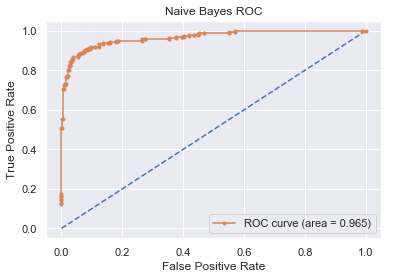

In [31]:
# ROC Curve to check performance of all NaiveBayes 
#generate ROC

#get probabilities for positives
probs = gb_mdl.predict_proba(X_test)
probs = probs[:, 1]
#get auc score
auc = roc_auc_score(y_test, probs)

#plot ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.3f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC')
plt.legend(loc="lower right")
plt.legend(loc="lower right")
# show the plot
plt.show()


In [32]:
#Empirical MCR
predictions = gb_mdl.predict(X)
MCR = 1 - accuracy_score(y, predictions)
print("Empirical MCR: ",round( MCR, 3))

#CV MCR
scores = cross_val_score(gb_mdl, X, y, cv=10)
CV_MCR = 1 - scores.mean()
print("CV MCR: ", round(MCR,3))

('Empirical MCR: ', 0.103)
('CV MCR: ', 0.103)


# Visualize Naive Bayes Results in Low-Dimension

explained variance ratio (first two components): [0.49624278 0.12574188]
explained variance ratio (first three components): [0.49624278 0.12574188 0.09362669]


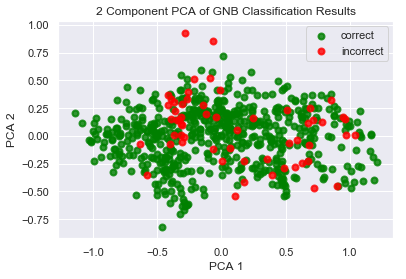

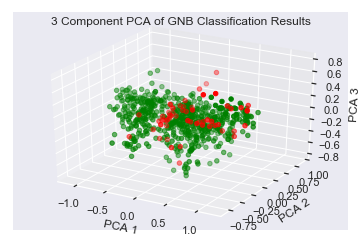

In [33]:
results=gb_mdl.predict(X_test) == y_test 
results=np.asarray(results)

#TWO Component PCA
pca = PCA(n_components=2)
X_r = pca.fit(X_test).transform(X_test)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['green', 'red']
lw = 2

for color, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    plt.scatter(X_r[results == i, 0], 
                X_r[results == i, 1], 
                color=color, 
                alpha=.8, 
                lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Component PCA of GNB Classification Results')



#THREE Component PCA
pca = PCA(n_components=3)
X_r = pca.fit(X_test).transform(X_test)

# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    
    ax.scatter(X_r[results == i, 0], 
               X_r[results == i, 1],
               X_r[results == i, 2], 
               c=c, )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3 Component PCA of GNB Classification Results')

plt.show()

# Train XGBoost Model

In [34]:
%%capture --no-stdout --no-display
# build model
xgb_mdl = XGBClassifier()
# fit model
xgb_mdl.fit(X_train,y_train)
# view hyperparameters
xgb_mdl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Evaluate XGBoost

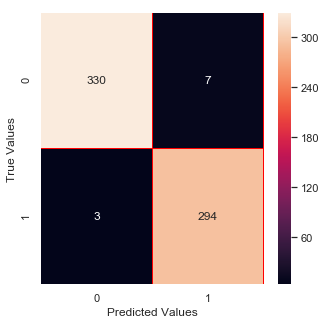

('accuracy:', 0.9842271293375394)


In [35]:
%%capture --no-stdout --no-display
#get accuracy and generate confusion matrix

#get predictions
predictions = xgb_mdl.predict(X_test)
#generate confusion matrix 
cm = confusion_matrix(y_test,predictions)
#visualize confusion matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
#get accuracy 
print("accuracy:",accuracy_score(y_test, predictions))

# Improve XGBoost

Optimize by cross-validated grid-search over a parameter grid

In [72]:
%%capture --no-stdout --no-display
# Let's do a grid search with parameters around default since XGBoost performs well
# Let's do a grid search with parameters around default since XGBoost performs well
parameters = {
    'learning_rate': [i/10.0 for i in range(2,4)],
    'gamma': [i/10.0 for i in range(0,2)],
    'max_depth': range(5,7),
    'min_child_weight': range(1,3),
    'max_delta_step': range(0,2),
    'subsample': [i/10.0 for i in range(8,10)],
    'colsample_bytree': [i/10.0 for i in range(8,10)],
    'colsample_bylevel': [i/10.0 for i in range(8,10)],
}
grid_search = GridSearchCV(xgb_mdl, parameters)

In [73]:
%%capture --no-stdout --no-display
# fit and retrieve best hyperparameters
grid_search.fit(X_train,y_train)
grid_search.best_score_, grid_search.best_params_
print(grid_search.best_params_)
print("Best score: %0.4f" % grid_search.best_score_)

{'colsample_bytree': 0.8, 'colsample_bylevel': 0.8, 'learning_rate': 0.2, 'max_delta_step': 1, 'min_child_weight': 1, 'subsample': 0.8, 'max_depth': 5, 'gamma': 0.0}
Best score: 0.9818


Build new XGBoost with optimized hyperparameters

In [74]:
%%capture --no-stdout --no-display
# Final Model Optimized
xgb_opt = XGBClassifier(colsample_bylevel=0.8,
                        colsample_bytree=0.8,
                        gamma=0.0,
                        learning_rate=0.2,
                        max_delta_step=1,
                        max_depth=5,
                        min_child_weight=1,
                        subsample=0.8)
xgb_opt.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0.0, learning_rate=0.2,
       max_delta_step=1, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

# Evaluate new XGBoost Model

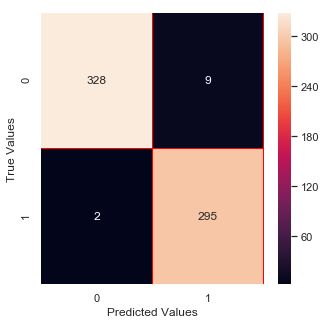

('accuracy:', 0.9826498422712934)


In [75]:
%%capture --no-stdout --no-display
#get predictions
predictions_new = xgb_opt.predict(X_test)
#generate confusion matrix 
cm = confusion_matrix(y_test,predictions_new)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
#get accuracy 
print("accuracy:",accuracy_score(y_test, predictions_new))

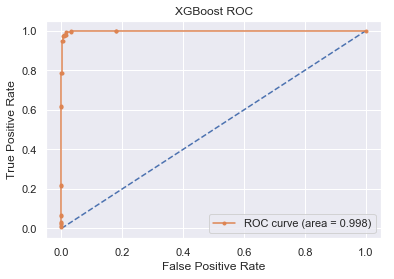

In [76]:
%%capture --no-stdout --no-display
#generate ROC

#get probabilities for positives
probs = xgb_opt.predict_proba(X_test)
probs = probs[:, 1]
#get auc score
auc = roc_auc_score(y_test, probs)

#plot ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.3f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC')
plt.legend(loc="lower right")
plt.legend(loc="lower right")
# show the plot
plt.show()

In [77]:
%%capture --no-stdout --no-display
#Compare Empirical MCR to CV MCR look for overfitting
#Empirical MCR
predictions = xgb_opt.predict(X)
MCR = 1 - accuracy_score(y, predictions)
print("Empirical MCR: ",round( MCR, 3))

#CV MCR
scores = cross_val_score(xgb_opt, X, y, cv=10)
CV_MCR = 1 - scores.mean()
print("CV MCR: ", round(MCR,3))

('Empirical MCR: ', 0.003)
('CV MCR: ', 0.003)


# Visualize XGBoost Results in Low-Dimension

explained variance ratio (first two components): [0.49624278 0.12574188]
explained variance ratio (first three components): [0.49624278 0.12574188 0.09362669]


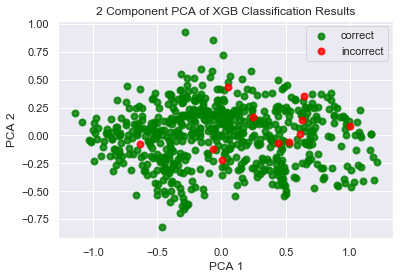

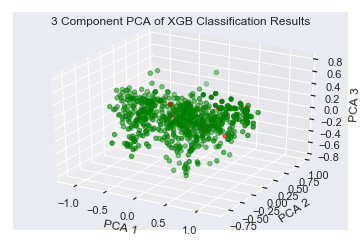

In [78]:
%%capture --no-stdout --no-display

results=xgb_opt.predict(X_test) == y_test 
results=np.asarray(results)

#TWO Component PCA
pca = PCA(n_components=2)
X_r = pca.fit(X_test).transform(X_test)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['green', 'red']
lw = 2

for color, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    plt.scatter(X_r[results == i, 0], 
                X_r[results == i, 1], 
                color=color, 
                alpha=.8, 
                lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Component PCA of XGB Classification Results')



#THREE Component PCA
pca = PCA(n_components=3)
X_r = pca.fit(X_test).transform(X_test)

# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    
    ax.scatter(X_r[results == i, 0], 
               X_r[results == i, 1],
               X_r[results == i, 2],
               c=c, )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3 Component PCA of XGB Classification Results')

plt.show()

# Train Decision Tree Model

In [43]:
# build model
dt_mdl = tree.DecisionTreeClassifier(max_depth=3) #96.5%
#fit model
dt_mdl = dt_mdl.fit(X_train, y_train) 
#view model details
print(dt_mdl)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Evaluate Decision Tree

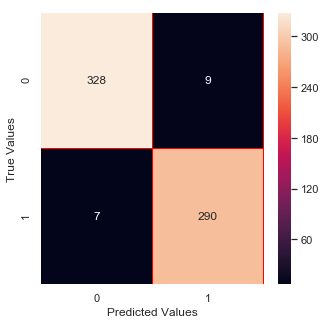

('accuracy:', 0.9747634069400631)


In [44]:
%%capture --no-stdout --no-display
#get predictions
predictions = dt_mdl.predict(X_test)
#generate confusion matrix 
cm = confusion_matrix(y_test,predictions)
#visualize confusion matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
#get accuracy 
print("accuracy:",accuracy_score(y_test, predictions))

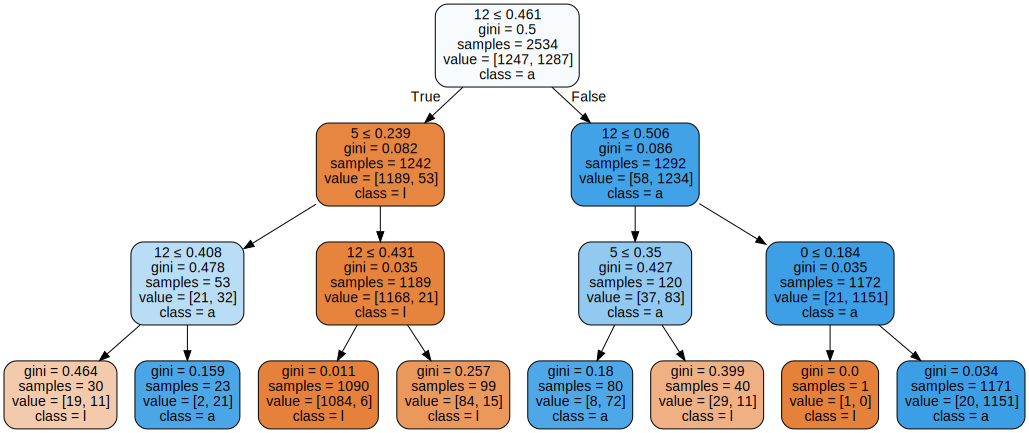

In [45]:
# plot decision tree graph
dot_data = tree.export_graphviz(dt_mdl, 
                                out_file=None,
                                feature_names=list(X_train),
                                class_names='label',
                                filled=True, 
                                rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

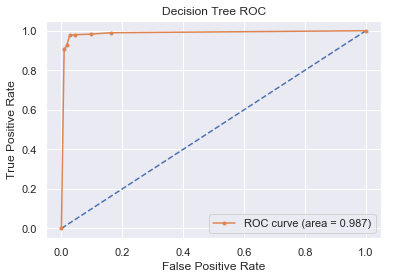

In [46]:
#generate ROC

#get probabilities for positives
probs = dt_mdl.predict_proba(X_test)
probs = probs[:, 1]
#get auc score
auc = roc_auc_score(y_test, probs)

#plot ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.3f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.legend(loc="lower right")
# show the plot
plt.show()

In [47]:
predictions = dt_mdl.predict(X)
MCR = 1 - accuracy_score(y, predictions)
print("Empirical MCR: ",round( MCR, 3))

#CV MCR
scores = cross_val_score(dt_mdl, X, y, cv=10)
CV_MCR = 1 - scores.mean()
print("CV MCR: ", round(MCR,3))

('Empirical MCR: ', 0.028)
('CV MCR: ', 0.028)


# Visualize Decision Tree Results in Low-Dimension

explained variance ratio (first two components): [0.49624278 0.12574188]
explained variance ratio (first three components): [0.49624278 0.12574188 0.09362669]


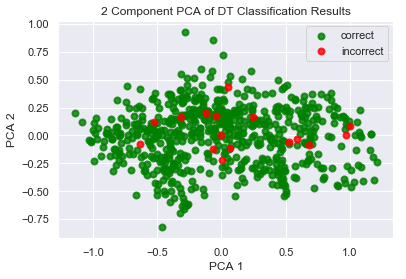

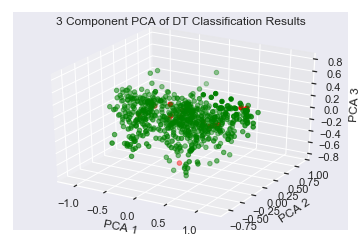

In [48]:
results=dt_mdl.predict(X_test) == y_test 
results=np.asarray(results)

#TWO Component PCA
pca = PCA(n_components=2)
X_r = pca.fit(X_test).transform(X_test)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['green', 'red']
lw = 2

for color, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    plt.scatter(X_r[results == i, 0], 
                X_r[results == i, 1], 
                color=color, 
                alpha=.8, 
                lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Component PCA of DT Classification Results')



#THREE Component PCA
pca = PCA(n_components=3)
X_r = pca.fit(X_test).transform(X_test)

# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    
    ax.scatter(X_r[results == i, 0], 
               X_r[results == i, 1],
               X_r[results == i, 2], 
               c=c, )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3 Component PCA of DT Classification Results')

plt.show()

# Train SVM Model

In [49]:
# build model
svm_mdl = svm.SVC(probability=True)
# fit model
svm_mdl.fit(X_train, y_train)
# view hyperparameters
print(svm_mdl)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Evaluate SVM Model

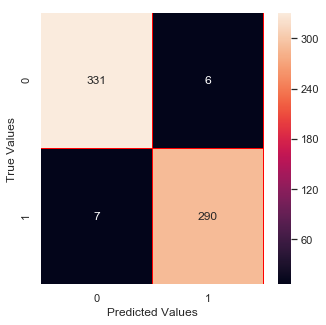

('accuracy:', 0.9794952681388013)


In [50]:
#get accuracy and generate confusion matrix

#get predictions
predictions = svm_mdl.predict(X_test)
#generate confusion matrix 
cm = confusion_matrix(y_test,predictions)
#visualize confusion matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
#get accuracy 
print("accuracy:",accuracy_score(y_test, predictions))

# Improve SVM Model

In [51]:
param_grid = [
  {
      'C': [1], 
      'degree': [0,1,2,3,4,5,6], 
      'kernel': ['poly']
  },
  {
      'C': [1, 10, 100, 1000], 
      'gamma': [0.001, 0.0001], 
      'kernel': ['rbf']
  },
 ]

svm_opt = svm.SVC(probability=True) 
svm_grid = GridSearchCV(svm_opt, param_grid, cv=10)

In [52]:
#fit and retrieve best hyperparameters
svm_grid.fit(X_train, y_train)
print(svm_grid.best_params_)
print("Best score: %0.4f" % svm_grid.best_score_)

{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
Best score: 0.9736


In [53]:
# build new model
svm_opt = svm.SVC(kernel='rbf',
                 C=1000,
                 gamma=0.001,
                 probability=True)
# fit training data
svm_opt.fit(X_train,y_train)
# view hyperparameters
print(svm_opt)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Evaluate Optimized SVM Model

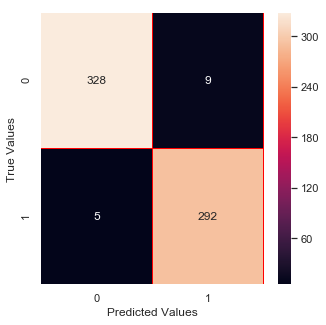

('accuracy:', 0.9779179810725552)


In [54]:
#get predictions
predictions_new = svm_opt.predict(X_test)
#generate confusion matrix 
cm = confusion_matrix(y_test,predictions_new)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
#get accuracy 
print("accuracy:",accuracy_score(y_test, predictions_new))


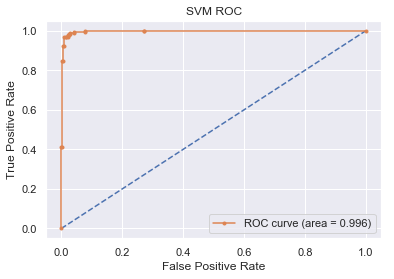

In [55]:
%%capture --no-stdout --no-display
#generate ROC

#get probabilities for positives
probs = svm_opt.predict_proba(X_test)
probs = probs[:, 1]
#get auc score
auc = roc_auc_score(y_test, probs)

#plot ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.3f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC')
plt.legend(loc="lower right")
plt.legend(loc="lower right")
# show the plot
plt.show()

In [56]:
predictions = svm_opt.predict(X)
MCR = 1 - accuracy_score(y, predictions)
print("Empirical MCR: ",round( MCR, 3))

#CV MCR
scores = cross_val_score(dt_mdl, X, y, cv=10)
CV_MCR = 1 - scores.mean()
print("CV MCR: ", round(MCR,3))

('Empirical MCR: ', 0.024)
('CV MCR: ', 0.024)


## Visualize SVM Results in Low Dimensions

explained variance ratio (first two components): [0.49624278 0.12574188]
explained variance ratio (first three components): [0.49624278 0.12574188 0.09362669]


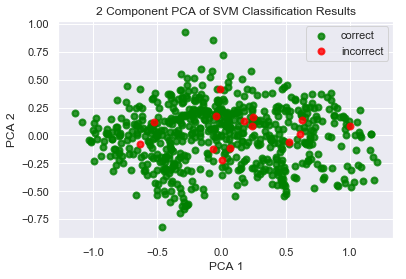

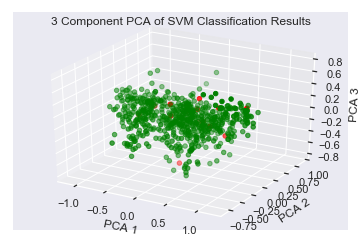

In [57]:
results=svm_opt.predict(X_test) == y_test 
results=np.asarray(results)

#TWO Component PCA
pca = PCA(n_components=2)
X_r = pca.fit(X_test).transform(X_test)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['green', 'red']
lw = 2

for color, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    plt.scatter(X_r[results == i, 0], 
                X_r[results == i, 1], 
                color=color, 
                alpha=.8, 
                lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Component PCA of SVM Classification Results')



#THREE Component PCA
pca = PCA(n_components=3)
X_r = pca.fit(X_test).transform(X_test)

# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, i, target_name in zip(colors, [1, 0], ['correct','incorrect']):
    
    ax.scatter(X_r[results == i, 0], 
               X_r[results == i, 1],
               X_r[results == i, 2], 
               c=c, )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3 Component PCA of SVM Classification Results')

plt.show()

# Model Comparison Plot

NN: 0.976713 (0.007792)
LR: 0.970015 (0.013092)
GNB: 0.893461 (0.017128)
XGB: 0.981057 (0.008054)
DT: 0.961722 (0.010302)
SVM: 0.973566 (0.008982)


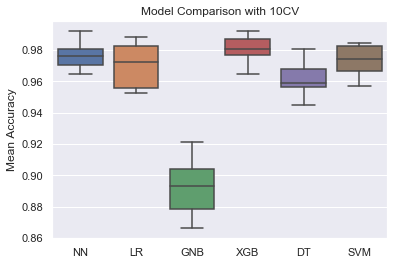

In [58]:
%%capture --no-stdout --no-display
# Model Comparison Plot
seed = 7
models = []
models.append(('NN',NN_new))
models.append(('LR',logreg_new))
models.append(('GNB',gb_mdl))
models.append(('XGB',xgb_opt))
models.append(('DT',dt_mdl))
models.append(('SVM',svm_opt))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
sns.boxplot(x=names,y=results)
plt.title('Model Comparison with 10CV')
plt.ylabel('Mean Accuracy')
plt.show()